The goal is just to make `.png` for comparisons in slides. We compare:

+ Original RTC images
+ The spatially despeckled images
+ The RABASAR despeckled images

In [3]:
import rasterio
import numpy
import scipy
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from itertools import starmap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import json

# Config

In [4]:
config_dict = json.load(open('config.json', 'r'))
config_dict

{'sensor': 'uavsar', 'site': 'waxlake', 'regularizer': 'tv'}

In [5]:
SENSOR = config_dict['sensor']
SITE = config_dict['site']
REGULARIZER = config_dict['regularizer']

In [6]:
WEIGHT = 1.

# Data Paths

In [18]:
data_dir_path_name = f'{SENSOR}_{SITE}/data_reprojected'
if REGULARIZER != 'tv':
    data_dir_path_name += '_tv'
DATA_DIR = Path(data_dir_path_name)
DATA_DIR.exists()

True

In [19]:
SPATIAL_DESPECKLE_DIR = Path(f'out/{SENSOR}_{SITE}_{REGULARIZER}/spatially_despeckled/weight_{WEIGHT:1.2f}')
SPATIAL_DESPECKLE_DIR.mkdir(exist_ok=True, parents=True)

In [41]:
OUT_DIR = Path(f'out/{SENSOR}_{SITE}_{REGULARIZER}/')
OUT_DIR.exists()

PLOT_DIR_NAME = OUT_DIR/f'plots/'
PLOT_DIR = Path(PLOT_DIR_NAME)
PLOT_DIR.mkdir(exist_ok=True, parents=True)

In [20]:
hh_paths_original = sorted(list(DATA_DIR.glob('*/*hh*.tif')))
hv_paths_original = sorted(list(DATA_DIR.glob('*/*hv*.tif')))
vv_paths_original = sorted(list(DATA_DIR.glob('*/*vv*.tif')))

hh_paths_original

[PosixPath('uavsar_waxlake/data_reprojected/hh/uavsar_waxlake_hh_RTC_20190620.tif'),
 PosixPath('uavsar_waxlake/data_reprojected/hh/uavsar_waxlake_hh_RTC_20190701.tif'),
 PosixPath('uavsar_waxlake/data_reprojected/hh/uavsar_waxlake_hh_RTC_20190716.tif'),
 PosixPath('uavsar_waxlake/data_reprojected/hh/uavsar_waxlake_hh_RTC_20190725.tif'),
 PosixPath('uavsar_waxlake/data_reprojected/hh/uavsar_waxlake_hh_RTC_20190812.tif'),
 PosixPath('uavsar_waxlake/data_reprojected/hh/uavsar_waxlake_hh_RTC_20190923.tif'),
 PosixPath('uavsar_waxlake/data_reprojected/hh/uavsar_waxlake_hh_RTC_20190930.tif')]

In [21]:
hh_paths_spatial = sorted(list(SPATIAL_DESPECKLE_DIR.glob('*hh/*.tif')))
hv_paths_spatial = sorted(list(SPATIAL_DESPECKLE_DIR.glob('*hv/*.tif')))
vv_paths_spatial = sorted(list(SPATIAL_DESPECKLE_DIR.glob('*vv/*vv*.tif')))

hh_paths_spatial

[PosixPath('out/uavsar_waxlake_tv/spatially_despeckled/weight_1.00/hh/uavsar_waxlake_hh_RTC_20190620_tv_1.00.tif'),
 PosixPath('out/uavsar_waxlake_tv/spatially_despeckled/weight_1.00/hh/uavsar_waxlake_hh_RTC_20190701_tv_1.00.tif'),
 PosixPath('out/uavsar_waxlake_tv/spatially_despeckled/weight_1.00/hh/uavsar_waxlake_hh_RTC_20190716_tv_1.00.tif'),
 PosixPath('out/uavsar_waxlake_tv/spatially_despeckled/weight_1.00/hh/uavsar_waxlake_hh_RTC_20190725_tv_1.00.tif'),
 PosixPath('out/uavsar_waxlake_tv/spatially_despeckled/weight_1.00/hh/uavsar_waxlake_hh_RTC_20190812_tv_1.00.tif'),
 PosixPath('out/uavsar_waxlake_tv/spatially_despeckled/weight_1.00/hh/uavsar_waxlake_hh_RTC_20190923_tv_1.00.tif'),
 PosixPath('out/uavsar_waxlake_tv/spatially_despeckled/weight_1.00/hh/uavsar_waxlake_hh_RTC_20190930_tv_1.00.tif')]

In [22]:
RATIO_DIR =Path(f'out/{SENSOR}_{SITE}_{REGULARIZER}/rabasar_{REGULARIZER}')
RATIO_DIR.exists()

True

In [23]:
hh_paths_rabasar = sorted(list(RATIO_DIR.glob('final*/hh/*hh*.tif')))
hv_paths_rabasar = sorted(list(RATIO_DIR.glob('final*/hv/*hv*.tif')))
vv_paths_rabasar = sorted(list(RATIO_DIR.glob('final*/vv/*vv*.tif')))

hh_paths_rabasar

[PosixPath('out/uavsar_waxlake_tv/rabasar_tv/final_weight_1.00/hh/uavsar_waxlake_hh_RTC_20190620_tv_weight_1.00.tif'),
 PosixPath('out/uavsar_waxlake_tv/rabasar_tv/final_weight_1.00/hh/uavsar_waxlake_hh_RTC_20190701_tv_weight_1.00.tif'),
 PosixPath('out/uavsar_waxlake_tv/rabasar_tv/final_weight_1.00/hh/uavsar_waxlake_hh_RTC_20190716_tv_weight_1.00.tif'),
 PosixPath('out/uavsar_waxlake_tv/rabasar_tv/final_weight_1.00/hh/uavsar_waxlake_hh_RTC_20190725_tv_weight_1.00.tif'),
 PosixPath('out/uavsar_waxlake_tv/rabasar_tv/final_weight_1.00/hh/uavsar_waxlake_hh_RTC_20190812_tv_weight_1.00.tif'),
 PosixPath('out/uavsar_waxlake_tv/rabasar_tv/final_weight_1.00/hh/uavsar_waxlake_hh_RTC_20190923_tv_weight_1.00.tif'),
 PosixPath('out/uavsar_waxlake_tv/rabasar_tv/final_weight_1.00/hh/uavsar_waxlake_hh_RTC_20190930_tv_weight_1.00.tif')]

In [24]:
def read_arr(path):
    with rasterio.open(path) as ds:
        arr = (ds.read(1))
    return arr

In [25]:
hv_ts = list(map(read_arr, tqdm(hv_paths_original)))
hh_ts = list(map(read_arr, tqdm(hh_paths_original)))
vv_ts = list(map(read_arr, tqdm(vv_paths_original)))

100%|██████████| 7/7 [00:02<00:00,  3.22it/s]


In [26]:
hv_ts_rabasar = list(map(read_arr, tqdm(hv_paths_rabasar)))
hh_ts_rabasar = list(map(read_arr, tqdm(hh_paths_rabasar)))
vv_ts_rabasar = list(map(read_arr, tqdm(vv_paths_rabasar)))

100%|██████████| 7/7 [00:01<00:00,  3.69it/s]


In [27]:
hh_ts_spatial = list(map(read_arr, tqdm(hh_paths_spatial)))
hv_ts_spatial = list(map(read_arr, tqdm(hv_paths_spatial)))
vv_ts_spatial = list(map(read_arr, tqdm(vv_paths_spatial)))

100%|██████████| 7/7 [00:01<00:00,  4.03it/s]


# Plotting

In [58]:
TS_INDEX = 0
SLICE_INDEX = 2

In [59]:
if SITE == 'waxlake' and SENSOR == 'uavsar':
    # Used in ENL estimates
    if SLICE_INDEX == 0:
        sy = np.s_[-2000:-1000]
        sx = np.s_[-3000:-2000]
    # Zoom Out East of Atchafalaya
    if SLICE_INDEX == 1:
        sy = np.s_[1_000:2_000]
        sx = np.s_[5_000:6_000]
    # Zoom In East of Atchafalaya
    if SLICE_INDEX == 2:
        sy = np.s_[1_200:1_600]
        sx = np.s_[5_200:5_600]

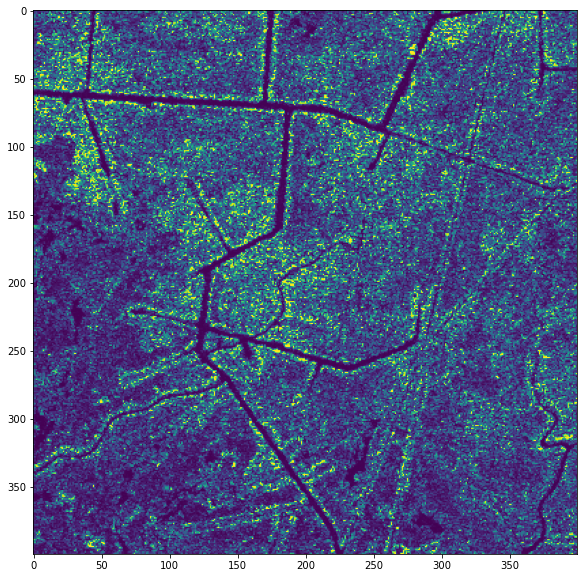

In [60]:
X = hh_ts[TS_INDEX][sy, sx]
plt.figure(figsize=(10, 10))
plt.imshow(X, vmin=0, vmax=1)

In [61]:
def plot(img, dest_path, title='', sy=np.s_[:], sx=np.s_[:], vmin=None, vmax=None, title_fs=20):
    fig, ax = plt.subplots(figsize=(9, 9))
    
    im = ax.imshow(img[sy, sx], vmin=vmin, vmax=vmax)
    divider = make_axes_locatable(ax)
    ax.set_title(title, fontsize=title_fs)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax)
    plt.savefig(dest_path)
    plt.close('all')
    return dest_path

In [62]:
def make_gif(dest_paths, out_gif_path):
    N = len(dest_paths)
    with Image() as wand:
        for k in range(N):
            with Image(filename=dest_paths[k]) as one:
                wand.sequence.append(one)

        for cursor in range(N):
            with wand.sequence[cursor] as frame:
                frame.delay = 120# * (cursor + 1)

        # Set layer type
        wand.type = 'optimize'
        wand.save(filename=out_gif_path)
    return out_gif_path

# Original

In [63]:
n = len(hv_paths_original)

In [ ]:
ORIGINAL_PLOT_DIR = PLOT_DIR/f'slice_index_{SLICE_INDEX}/original'
ORIGINAL_PLOT_DIR.mkdir(exist_ok=True, parents=True)

for time_series, paths, pol in zip([hh_ts, hv_ts],
                                   [hh_paths_original, hv_paths_original],
                                   ['hh', 'hv']):
    dest_dir = ORIGINAL_PLOT_DIR/pol
    dest_dir.mkdir(exist_ok=True, parents=True)
    
    #dest_paths = [dest_dir/path.name[:22] for path in paths]
    dest_paths = [dest_dir/f'p-{k}' for k in range(n)]

    
    if pol == 'hv':
        vmax=.2
    else:
        vmax=.9
        
    plot_partial = lambda img, dest_path, title: plot(img, dest_path, title=title,
                                           vmin=0, vmax=vmax, 
                                           sy=sy, sx=sx)
    titles = list(map(lambda x: x.name, paths))
    list(starmap(plot_partial, zip(tqdm(time_series), dest_paths, titles)))

 71%|███████▏  | 5/7 [00:01<00:00,  4.01it/s]

# Spatial

In [ ]:
SPATIAL_PLOT_DIR = ORIGINAL_PLOT_DIR = PLOT_DIR/f'slice_index_{SLICE_INDEX}/spatial__{REGULARIZER}_weight_{WEIGHT:1.2f}'
SPATIAL_PLOT_DIR.mkdir(exist_ok=True, parents=True)

for time_series, paths, pol in zip([hh_ts_spatial, hv_ts_spatial],
                                   [hh_paths_spatial, hv_paths_spatial],
                                   ['hh', 'hv']):
    dest_dir = SPATIAL_PLOT_DIR/pol
    dest_dir.mkdir(exist_ok=True, parents=True)
    
    #dest_paths = [dest_dir/path.name[:22] for path in paths]
    dest_paths = [dest_dir/f'p-{k}' for k in range(n)]

    
    if pol == 'hv':
        vmax=.2
    else:
        vmax=.9
        
    plot_partial = lambda img, dest_path, title: plot(img, dest_path, title=title,
                                                      vmin=0, vmax=vmax, 
                                                      sy=sy, sx=sx)
    titles = list(map(lambda x: x.name, paths))
    list(starmap(plot_partial, zip(tqdm(time_series), dest_paths, titles)))

# Rabasar

In [57]:
RABASAR_PLOT_DIR = PLOT_DIR/f'slice_index_{SLICE_INDEX}/rabasar_{REGULARIZER}_weight_{WEIGHT:1.2f}'
RABASAR_PLOT_DIR.mkdir(exist_ok=True, parents=True)

for time_series, paths, pol in zip([hh_ts_rabasar, hv_ts_rabasar],
                                   [hh_paths_rabasar, hv_paths_rabasar],
                                   ['hh', 'hv']):
    dest_dir = RABASAR_PLOT_DIR/pol
    dest_dir.mkdir(exist_ok=True, parents=True)
    
    #dest_paths = [dest_dir/path.name[:22] for path in paths]
    dest_paths = [dest_dir/f'p-{k}' for k in range(n)]

    if pol == 'hv':
        vmax=.2
    else:
        vmax=.9
        
    plot_partial = lambda img, dest_path, title: plot(img, dest_path, title=title,
                                                      vmin=0, vmax=vmax, 
                                                      sy=sy, sx=sx)
    titles = list(map(lambda x: x.name, paths))
    list(starmap(plot_partial, zip(tqdm(time_series), dest_paths, titles)))

100%|██████████| 7/7 [00:01<00:00,  3.84it/s]
